# Clase 04 - Mapas y redes

Profesor: **Fernando Becerra**, f.becerra@udd.cl, [www.fernandobecerra.com](www.fernandobecerra.com)

En esta clase expanderemos aún más nuestro repertorio de visualizaciones aprendiendo a trabajas con mapas y redes. Para los datos geográficos trabajaremos con el paquete `geopandas`, el cual tiene algunos requerimientos extras que deben ser instalados, y los datos de redes usaremos `networkx`.

## Mapas

Importamos los paquetes estándar para comenzar a trabajar en visualización de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Para mapas y datos geográficos usaremos [geopandas](https://geopandas.org/en/stable/index.html), paquete que extiende los tipos de datos que puede cargar `pandas` para poder ejecutar operaciones espaciales en datos de tipo geométricos.

In [2]:
import geopandas as gpd

Para cargar datos geográficos ocupamos la función `read_file` de geopandas. En cuanto a formato de los datos, usualmente los podemos encontrar ya sea en shapefile (`.shp`) o geojson (`.geojson` o simplemente `.json`). Para este ejemplo usaremos datos de la Región Metropolitana.

In [3]:
rm = gpd.read_file('../../datos/RM/LIMITE_URBANO_CENSAL_C17.shp')
rm.head()

REGION                        NOM_REGION PROVINCIA NOM_PROVIN COMUNA  \
0     13  REGIÓN METROPOLITANA DE SANTIAGO       134      MAIPO  13404   
1     13  REGIÓN METROPOLITANA DE SANTIAGO       134      MAIPO  13404   
2     13  REGIÓN METROPOLITANA DE SANTIAGO       134      MAIPO  13404   
3     13  REGIÓN METROPOLITANA DE SANTIAGO       134      MAIPO  13404   
4     13  REGIÓN METROPOLITANA DE SANTIAGO       134      MAIPO  13404   

  NOM_COMUNA                URBANO             TIPO NOM_CATEG  SHAPE_Leng  \
0      PAINE                 PAINE  CAPITAL COMUNAL    CIUDAD    0.146714   
1      PAINE              HUELQUÉN           URBANO    PUEBLO    0.167916   
2      PAINE              HOSPITAL           URBANO    CIUDAD    0.139694   
3      PAINE  PINTUÉ - LA GUACHERA           URBANO    PUEBLO    0.148207   
4      PAINE           EL TRÁNSITO           URBANO    PUEBLO    0.073625   

   SHAPE_Area                                           geometry  
0    0.000531  POLYGON ((-70.73797 -33.79851, -70.73738 -33.7...  
1    0.000205  POLYGON ((-70.64840 -33.81521, -70.64859 -33.8...  
2    0.000445  POLYGON ((-70.76468 -33.84349, -70.76448 -33.8...  
3    0.000292  POLYGON ((-70.87824 -33.86540, -70.87839 -33.8...  
4    0.000066  POLYGON ((-70.65834 -33.78357, -70.65832 -33.7...

Como `geopandas` es básicamente una extensión de `pandas`, los dataframe cargados tiene funciones y métodos similares. Usemos, por ejemplo, el `.plot`.

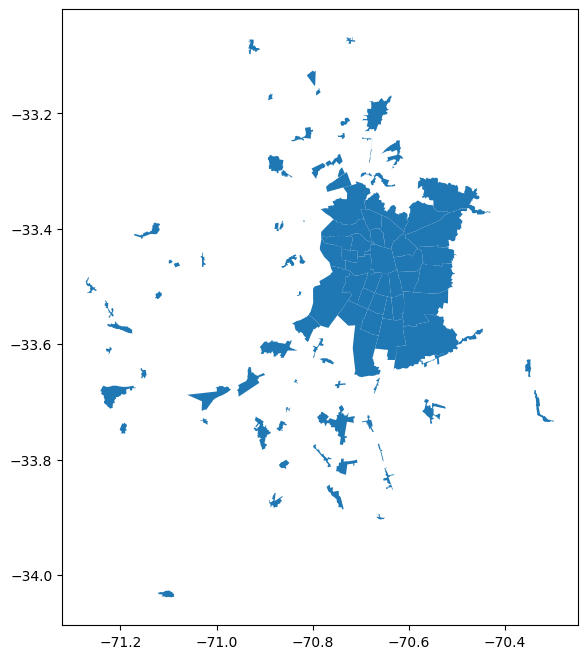

In [4]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

rm.plot(ax=ax)

plt.show()

### Graficando datos espaciales

Ahora probemos graficando datos espaciales. [Tercera dosis](https://terceradosis.cl/2022/09/16/plebiscito-de-salida-y-la-distribucion-urbana-de-la-elite-progresista-los-veinte-barrios-donde-se-concentro-el-apruebo-en-santiago/) publicó un interesante artículo/análisis del resultado del plebiscito. Lo interesante es que incluye dos visualizaciones y además comparten el código que usaron para hacer los mapas en forma de [notebook](https://colab.research.google.com/drive/1VxBXA_Dqdme4C6GLTYlywUHLOHkNyI02?usp=sharing). Así que veremos si logramos reproducir las figuras y discutiremos cómo les podemos hacer pequeñas mejoras.

Ahora tenemos que bajar los datos que los autores compartieron desde [acá](https://storage.googleapis.com/notas-blog-public/varios/sf_santiago_plebiscito.zip) y ver qué es lo que hay adentro.

In [5]:
barrios = gpd.read_file('../../datos/sf_santiago_plebiscito/voronoi_attributes.shp')
barrios.sample(3)

codigo_loc     comuna      nse_i   apruebo   rechazo  tot_valido  \
340  [2204, 2205]      ÑUÑOA  68.202218  0.505134  0.494866       11785   
280        [2111]      MACUL  42.777415  0.479986  0.520014        5521   
253        [2082]  LO ESPEJO  34.651757  0.510995  0.489005        4775   

                                              geometry  
340  POLYGON ((-70.61390 -33.45951, -70.60950 -33.4...  
280  POLYGON ((-70.61893 -33.48706, -70.60606 -33.4...  
253  POLYGON ((-70.67524 -33.51962, -70.67935 -33.5...

### Figura 1

Como ya sabemos graficar con `geopandas`, copiemos y peguemos el código del notebook.

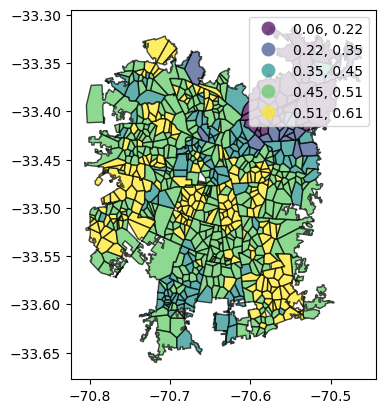

In [6]:
ax = barrios.plot(column = 'apruebo', edgecolor = "black", legend = True, alpha = 0.7, scheme='fisher_jenks')

plt.show()

Hay algunas pequeñas diferencias con la [imágen publicada en el artículo](https://i0.wp.com/terceradosis.cl/wp-content/uploads/2022/09/image-12.png). Tratemos de hacerlo lo más cercano posible.

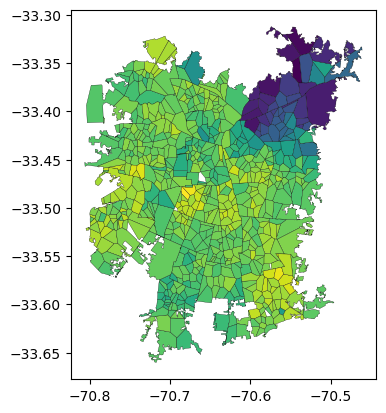

In [7]:
ax = barrios.plot(column = 'apruebo', edgecolor = "black", legend = False, alpha = 1.0, linewidth=0.2)

plt.show()

Esta geometría se llama [celdas de Voronoi](https://en.wikipedia.org/wiki/Voronoi_diagram) y son útiles para [dividir el espacio en base a una serie de puntos](https://observablehq.com/@d3/voronoi-labels), donde el resultado es que cada celda es la más cercana sólo a uno de aquellos puntos.

Del artículo podemos sacar el tema en el que se están tratando de enfocar.

> En la Figura 1, los colores oscuros reflejan una mayor votación por la opción “rechazo”, y colores claros representan más votos para el “apruebo”

Ahora cabe la pregunta, ¿es esa la mejor forma de visualizar esos datos? ¿Qué formas alternativas se les ocurren?

Partamos por examinar los datos un poco más.

In [8]:
barrios['apruebo'].describe()

count    700.000000
mean       0.463568
std        0.087756
min        0.060670
25%        0.451047
50%        0.482792
75%        0.510087
max        0.605605
Name: apruebo, dtype: float64

Como aquí se quiere hacer una distinción entre apruebo/rechazo, creo que lo más conveniente sería tener distintos colores para cada opción. Para esto, yo usaría un mapa de color divergente con el límite en 0.5, que es lo que indica si gano el apruebo o el rechazo en cada lugar.

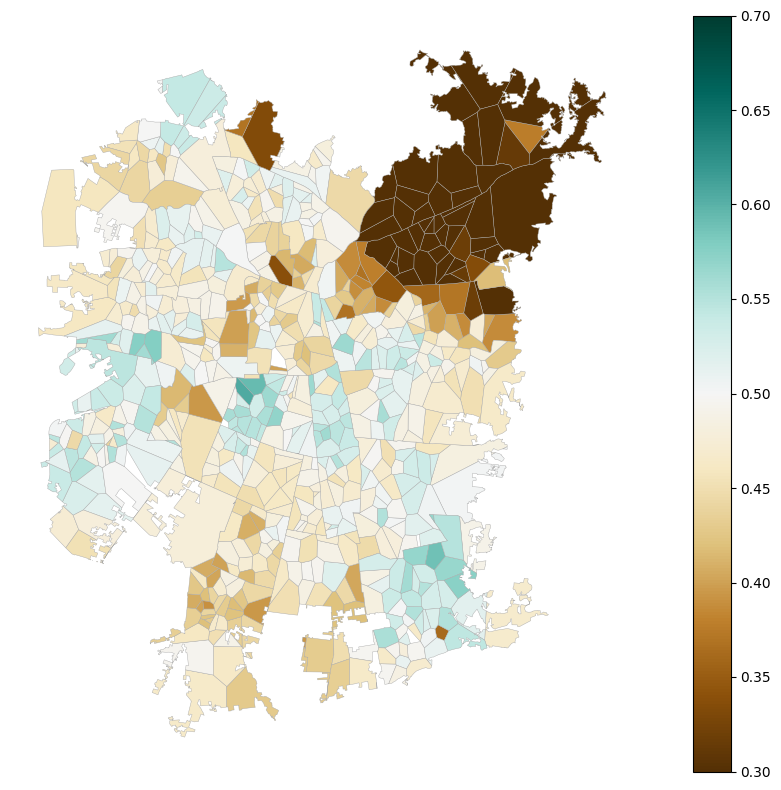

In [9]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

barrios.plot(column='apruebo', edgecolor="darkgray", legend=True, alpha=1.0, ax=ax, linewidth=0.3,
             cmap='BrBG', vmin=0.3, vmax=0.7)

ax.set_axis_off()
plt.tight_layout()
plt.show()

Ahora los comparamos

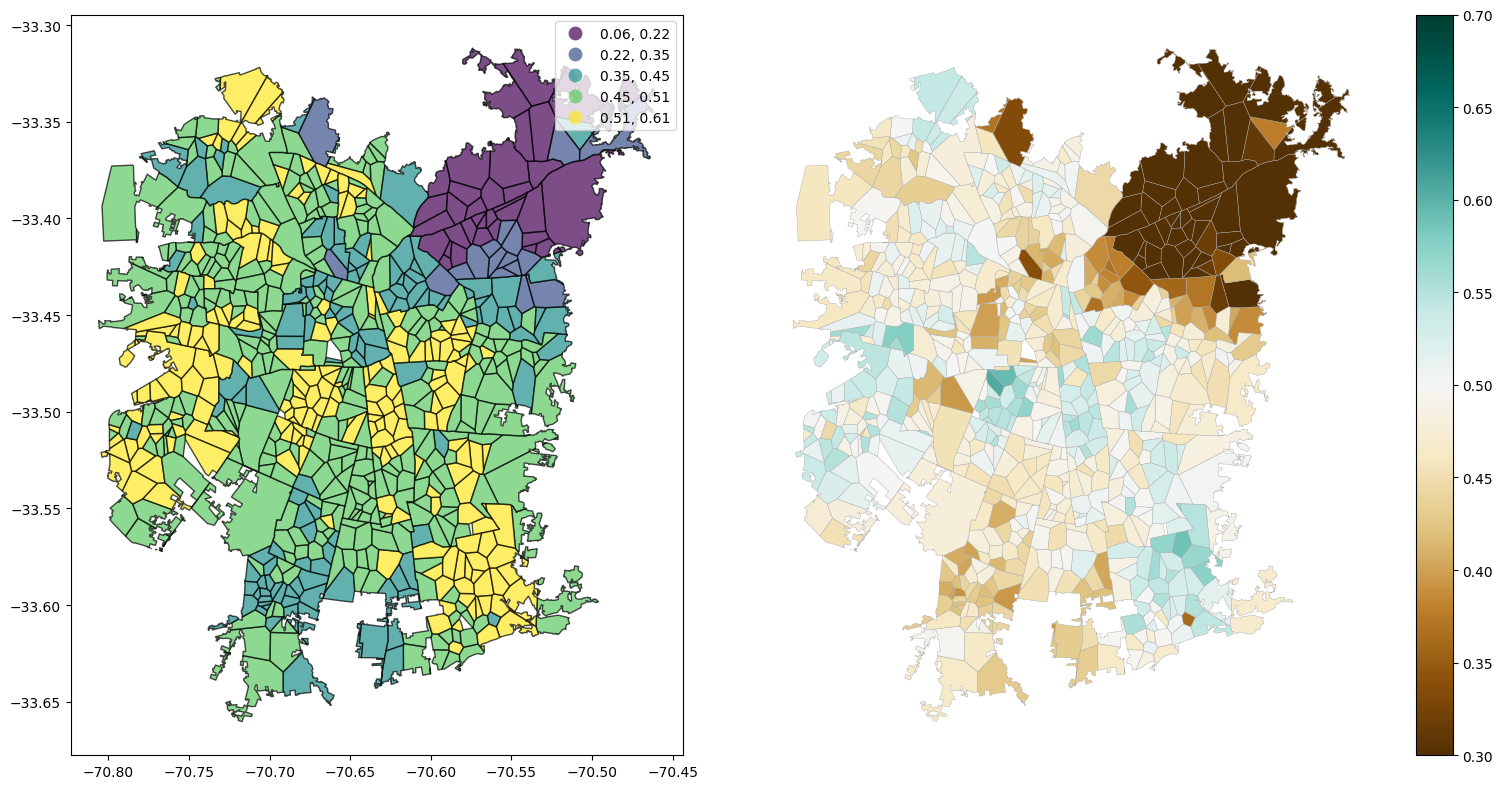

In [10]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

barrios.plot(column = 'apruebo', edgecolor = "black", legend = True, alpha = 0.7, scheme='fisher_jenks', ax=ax[0])
barrios.plot(column='apruebo', edgecolor="darkgray", legend=True, alpha=1.0, ax=ax[1], linewidth=0.3,
             cmap='BrBG', vmin=0.3, vmax=0.7)

ax[1].set_axis_off()
plt.tight_layout()
plt.show()

### Figura 2

Copiemos y peguemos el código que usaron ellos.

In [11]:
# función para generar paleta de colores a partir de dos variables
def colorFromBivariateData(Z1,Z2,cmap1 = plt.cm.YlOrRd, cmap2 = plt.cm.PuBuGn):
    Z1_plot = np.array(255*(Z1-Z1.min())/(Z1.max()-Z1.min()), dtype = int)
    Z2_plot = np.array(255*(Z2-Z2.min())/(Z2.max()-Z2.min()), dtype = int)
    Z1_color = cmap1(Z1_plot)
    Z2_color = cmap2(Z2_plot)
    Z_color = Z1_color * Z2_color    
    return Z_color

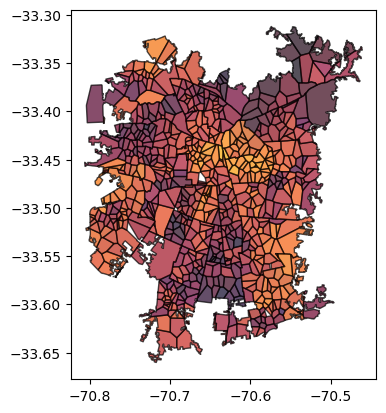

In [12]:
gdf_filter = barrios
pal = plt.cm.plasma
Z_color = colorFromBivariateData(gdf_filter['apruebo'], gdf_filter['nse_i'], cmap1 = pal, cmap2 = pal)
ax = gdf_filter.plot(color = Z_color, edgecolor = "black", legend = True, alpha = 0.7, scheme='fisher_jenks')

plt.show()

In [13]:
barrios['nunoismo'] = barrios['apruebo'] * barrios['nse_i']
barrios['nunoismo'].describe()

count    700.000000
mean      21.263611
std       10.763150
min        1.222096
25%       12.489717
50%       19.956328
75%       29.278297
max       49.707287
Name: nunoismo, dtype: float64

Graficamos

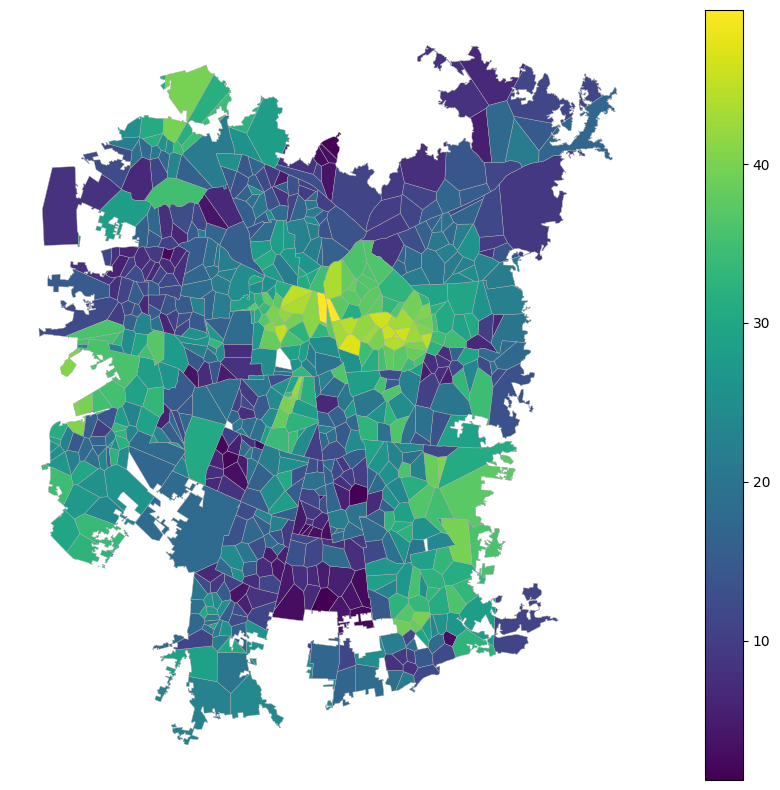

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

barrios.plot(column='nunoismo', edgecolor="darkgray", legend=True, alpha=1.0, ax=ax, linewidth=0.3,
             cmap='viridis')

ax.set_axis_off()
plt.tight_layout()
plt.show()

Y comparamos

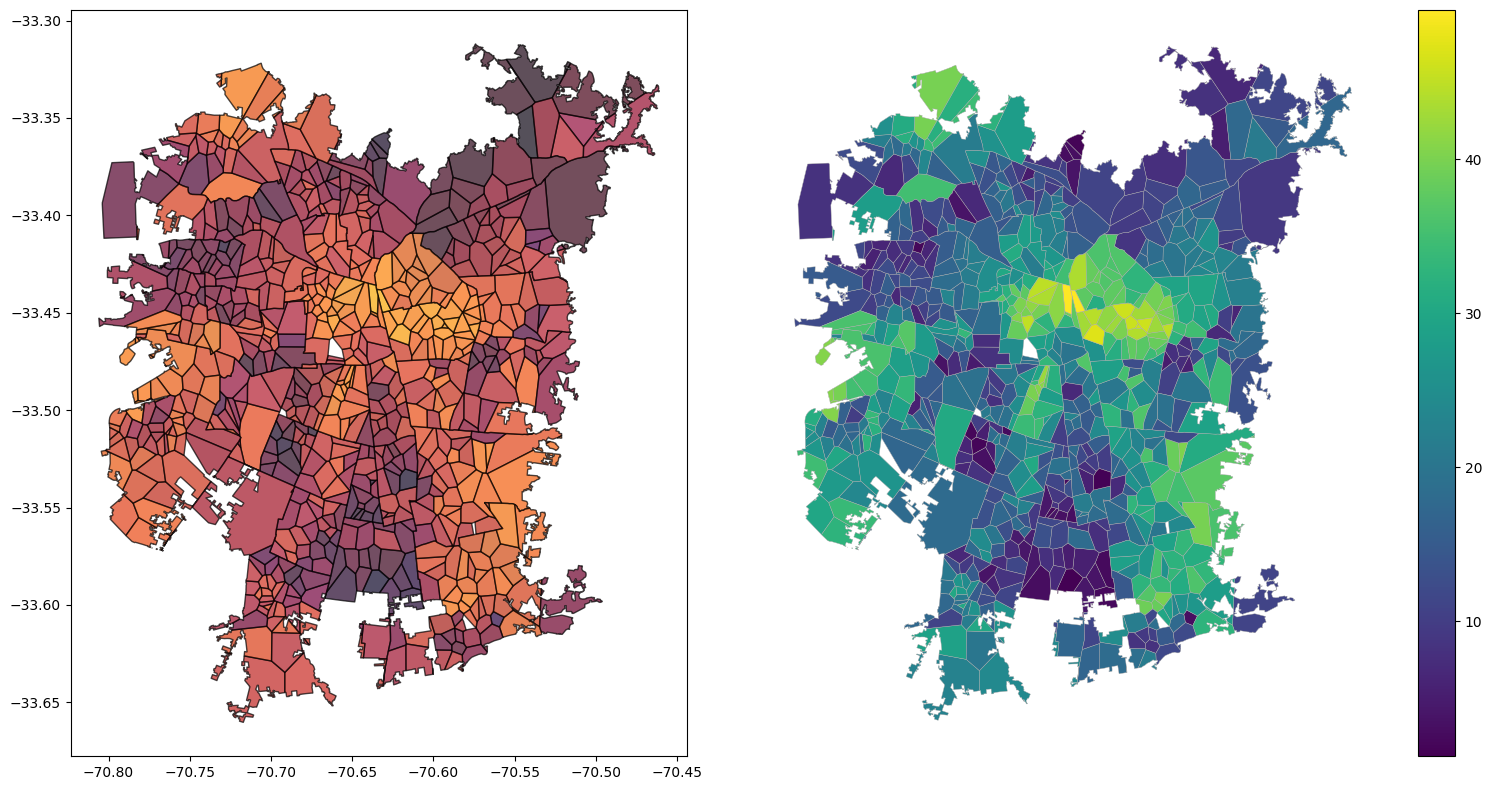

In [15]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

gdf_filter.plot(color = Z_color, edgecolor = "black", legend = True, alpha = 0.7, scheme='fisher_jenks', ax=ax[0])
barrios.plot(column='nunoismo', edgecolor="darkgray", legend=True, alpha=1.0, ax=ax[1], linewidth=0.3,
             cmap='viridis')

ax[1].set_axis_off()
plt.tight_layout()
plt.show()

¿Qué diferencias hay entre ambas representaciones? ¿Qué tan efectivas son al comunicar los datos? ¿Cuál prefieren?

### Calculando datos espaciales

Ahora carguemos más datos. ¿Se acuerdan de los datos de la Encuesta Origen Destino que usamos la clase pasada?  Bueno, carguemos la geografía para esos datos.

In [16]:
zonas_eod = gpd.read_file('../../datos/EOD2012/Zonificacion_EOD2012.shp')
zonas_eod.head()

ID      AREA   Zona    Com     Comuna  \
0  103  837.7500  103.0  13105  El Bosque   
1  104  998.8125  104.0  13105  El Bosque   
2  106  286.2500  106.0  13105  El Bosque   
3  115  857.4375  115.0  13105  El Bosque   
4  116  853.9375  116.0  13105  El Bosque   

                                            geometry  
0  POLYGON ((346376.693 6286027.029, 346366.556 6...  
1  POLYGON ((344151.235 6285465.040, 344263.705 6...  
2  POLYGON ((344415.434 6285878.048, 344263.705 6...  
3  POLYGON ((344415.434 6285878.048, 344412.704 6...  
4  POLYGON ((345133.421 6286261.983, 345243.965 6...

Y grafiquémosla

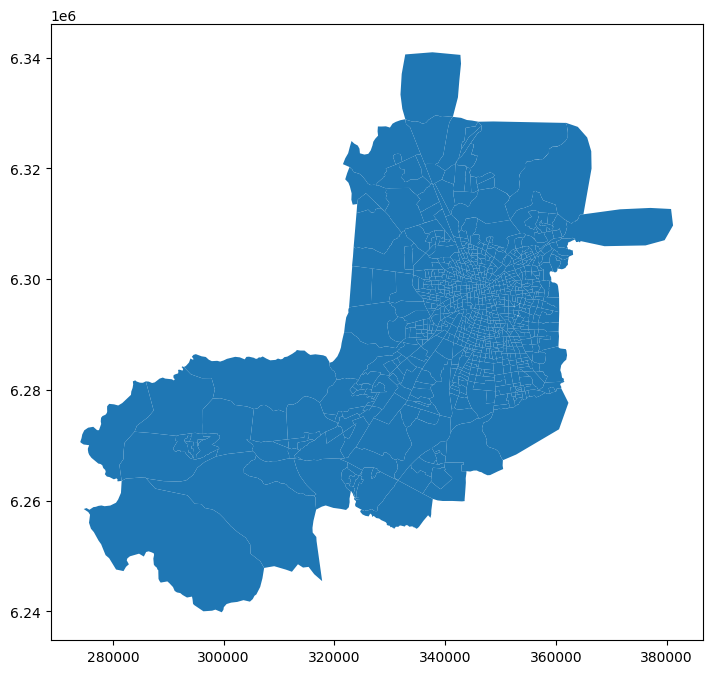

In [17]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

zonas_eod.plot(ax=ax)

plt.show()

Carguemos los mismos datos de la semana pasada, que tienen la información de los viajes de las personas encuestadas

In [18]:
viajes_persona = pd.read_csv('../../datos/eod_processed.csv')
viajes_persona = viajes_persona[pd.notnull(viajes_persona['PesoLaboral'])]
viajes_persona.head()

Hogar   Persona  Etapas ComunaOrigen ComunaDestino SectorOrigen  \
0  173431  17343102       1        Maipú         Maipú     Poniente   
1  173431  17343102       1        Maipú         Maipú     Poniente   
2  173441  17344101       2        Maipú    Las Condes     Poniente   
3  173441  17344101       2   Las Condes         Maipú      Oriente   
4  173441  17344103       2        Maipú         Ñuñoa     Poniente   

  SectorDestino  ZonaOrigen  ZonaDestino  OrigenCoordX  ...  NumBicAdulto  \
0      Poniente         400          407   335208.7188  ...             0   
1      Poniente         407          400   338812.2813  ...             0   
2       Oriente         407          307   338536.4375  ...             0   
3      Poniente         307          407   354267.3438  ...             0   
4       Oriente         407          437   338536.4375  ...             0   

   NumBicNino  Propiedad MontoDiv ImputadoDiv  MontoArr ImputadoArr  \
0           0          2  81067.0           1    120000           0   
1           0          2  81067.0           1    120000           0   
2           0          2  57000.0           0    140000           0   
3           0          2  57000.0           0    140000           0   
4           0          2  57000.0           0    140000           0   

   IngresoHogar  FactorHogar  PesoLaboral  
0        789356     76.81028   142.337500  
1        789356     76.81028   142.337500  
2        633883     76.81028   127.328613  
3        633883     76.81028   127.328613  
4        633883     76.81028   116.697351  

[5 rows x 96 columns]

Filtremos sólo las zonas que están presentes en los datos de viajes y probemos intersectándolas con los datos de la Región Metropolitana

/var/folders/cm/5r0bmw2x03l8z7rcxqb5wmq00000gn/T/ipykernel_81583/35467911.py:4: UserWarning: `keep_geom_type=True` in overlay resulted in 4829 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  zonas_urbanas = gpd.overlay(zonas_con_viajes, zonas_eod, how='intersection')


<AxesSubplot:>

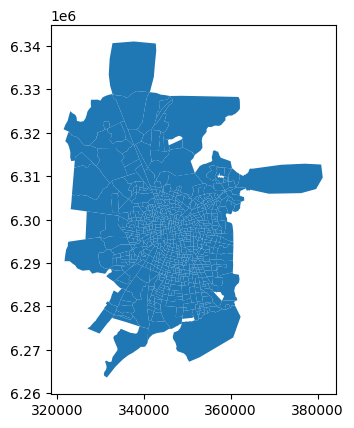

In [19]:
zonas_con_viajes = zonas_eod[zonas_eod.ID.isin(viajes_persona.ZonaOrigen.unique())
                           & zonas_eod.ID.isin(viajes_persona.ZonaDestino.unique())]

zonas_urbanas = gpd.overlay(zonas_con_viajes, zonas_eod, how='intersection')
zonas_urbanas.plot()

Una última transformación para poder trabajar con los datos

In [20]:
zonas_urbanas.head()

ID_1    AREA_1  Zona_1  Com_1   Comuna_1  ID_2    AREA_2  Zona_2  Com_2  \
0   103  837.7500   103.0  13105  El Bosque   103  837.7500   103.0  13105   
1   116  853.9375   116.0  13105  El Bosque   103  837.7500   103.0  13105   
2   112  282.0625   112.0  13105  El Bosque   103  837.7500   103.0  13105   
3   103  837.7500   103.0  13105  El Bosque   116  853.9375   116.0  13105   
4   104  998.8125   104.0  13105  El Bosque   116  853.9375   116.0  13105   

    Comuna_2                                           geometry  
0  El Bosque  POLYGON ((346366.556 6285963.977, 346371.218 6...  
1  El Bosque  POLYGON ((345755.328 6285505.538, 345706.122 6...  
2  El Bosque  POLYGON ((345958.480 6285171.052, 346192.404 6...  
3  El Bosque  POLYGON ((345755.685 6285510.341, 345755.328 6...  
4  El Bosque  POLYGON ((345095.929 6286093.007, 345063.047 6...

In [21]:
zonas_urbanas = zonas_urbanas[~zonas_urbanas.Comuna_1.isin(['Pirque', 'Calera de Tango', 'Lampa', 'Colina'])]
zonas_urbanas = zonas_urbanas.set_index('ID_1')
zonas_urbanas.head()

AREA_1  Zona_1  Com_1   Comuna_1  ID_2    AREA_2  Zona_2  Com_2  \
ID_1                                                                      
103   837.7500   103.0  13105  El Bosque   103  837.7500   103.0  13105   
116   853.9375   116.0  13105  El Bosque   103  837.7500   103.0  13105   
112   282.0625   112.0  13105  El Bosque   103  837.7500   103.0  13105   
103   837.7500   103.0  13105  El Bosque   116  853.9375   116.0  13105   
104   998.8125   104.0  13105  El Bosque   116  853.9375   116.0  13105   

       Comuna_2                                           geometry  
ID_1                                                                
103   El Bosque  POLYGON ((346366.556 6285963.977, 346371.218 6...  
116   El Bosque  POLYGON ((345755.328 6285505.538, 345706.122 6...  
112   El Bosque  POLYGON ((345958.480 6285171.052, 346192.404 6...  
103   El Bosque  POLYGON ((345755.685 6285510.341, 345755.328 6...  
104   El Bosque  POLYGON ((345095.929 6286093.007, 345063.047 6...

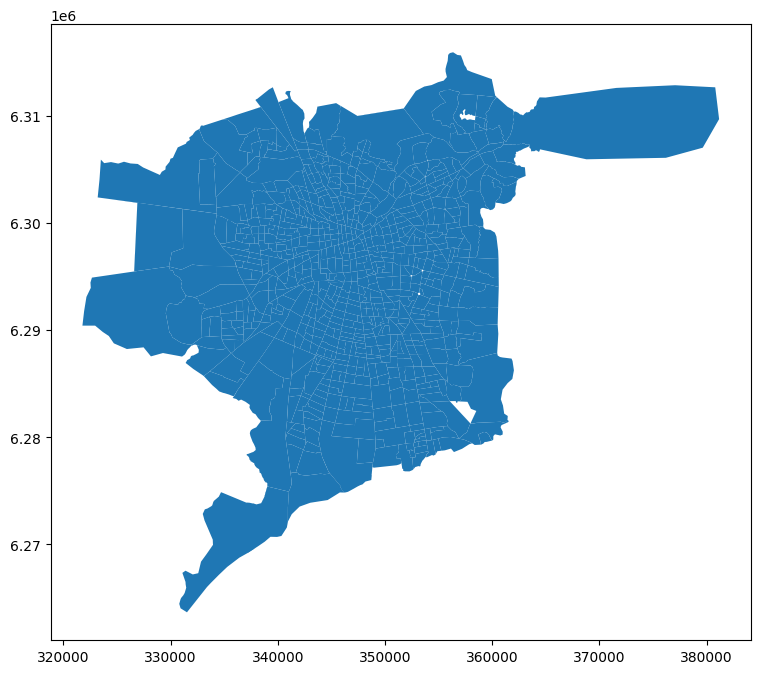

In [22]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

zonas_urbanas.plot(ax=ax)

plt.show()

### Choropleth

Para hacer un chroropleth vamos a asignarle a cada zona un valor. En nuestro ejemplo, este valor será la distancia que recorren la gente de esa comuna en su viaje hacia el trabajo. Para trabajar con los datos de viajes, primero debemos transformarlos a un GeoDataFrame.

In [23]:
origenes_viajes = gpd.GeoDataFrame(viajes_persona,
                                geometry=gpd.points_from_xy(viajes_persona['OrigenCoordX'], viajes_persona['OrigenCoordY']),
                                crs=zonas_eod.crs)
origenes_viajes.head()


Hogar   Persona  Etapas ComunaOrigen ComunaDestino SectorOrigen  \
0  173431  17343102       1        Maipú         Maipú     Poniente   
1  173431  17343102       1        Maipú         Maipú     Poniente   
2  173441  17344101       2        Maipú    Las Condes     Poniente   
3  173441  17344101       2   Las Condes         Maipú      Oriente   
4  173441  17344103       2        Maipú         Ñuñoa     Poniente   

  SectorDestino  ZonaOrigen  ZonaDestino  OrigenCoordX  ...  NumBicNino  \
0      Poniente         400          407   335208.7188  ...           0   
1      Poniente         407          400   338812.2813  ...           0   
2       Oriente         407          307   338536.4375  ...           0   
3      Poniente         307          407   354267.3438  ...           0   
4       Oriente         407          437   338536.4375  ...           0   

   Propiedad  MontoDiv ImputadoDiv MontoArr  ImputadoArr IngresoHogar  \
0          2   81067.0           1   120000            0       789356   
1          2   81067.0           1   120000            0       789356   
2          2   57000.0           0   140000            0       633883   
3          2   57000.0           0   140000            0       633883   
4          2   57000.0           0   140000            0       633883   

   FactorHogar  PesoLaboral                        geometry  
0     76.81028   142.337500  POINT (335208.719 6288387.000)  
1     76.81028   142.337500  POINT (338812.281 6292391.000)  
2     76.81028   127.328613  POINT (338536.438 6291928.000)  
3     76.81028   127.328613  POINT (354267.344 6302297.000)  
4     76.81028   116.697351  POINT (338536.438 6291928.000)  

[5 rows x 97 columns]

Para calcular la distancia de la comuna de origen, tomaremos un promedio ponderado del atributo `DistEuclidiana` (que ya viene en los datos) de cada viaje.

In [24]:
def weighted_mean(df, value='DistEuclidiana', weight='PesoLaboral'):
    weighted_sum = (df[value] * df[weight]).sum()
    return weighted_sum / df[weight].sum()

viajes_trabajo = viajes_persona[(viajes_persona.PropositoAgregado == 'Trabajo') &
                                (pd.notnull(viajes_persona.PesoLaboral))]
distancia_zonas = viajes_trabajo.groupby(['ZonaOrigen']).apply(weighted_mean)
distancia_zonas.name = 'distancia_al_trabajo'

In [25]:
viajes_trabajo.head()

Hogar   Persona  Etapas ComunaOrigen ComunaDestino SectorOrigen  \
2   173441  17344101       2        Maipú    Las Condes     Poniente   
4   173441  17344103       2        Maipú         Ñuñoa     Poniente   
9   173462  17346201       1        Maipú         Maipú     Poniente   
16  173462  17346206       2        Maipú      Pudahuel     Poniente   
20  173471  17347102       1        Maipú      Santiago     Poniente   

   SectorDestino  ZonaOrigen  ZonaDestino  OrigenCoordX  ...  NumBicNino  \
2        Oriente         407          307   338536.4375  ...           0   
4        Oriente         407          437   338536.4375  ...           0   
9       Poniente         398          398   336246.9063  ...           0   
16      Poniente         398          537   334334.0938  ...           0   
20        Centro         398            7   334265.3750  ...           0   

    Propiedad  MontoDiv ImputadoDiv MontoArr  ImputadoArr IngresoHogar  \
2           2   57000.0           0   140000            0       633883   
4           2   57000.0           0   140000            0       633883   
9           2  179854.0           1   230000            0      1359063   
16          2  179854.0           1   230000            0      1359063   
20          1       NaN           0   240000            0      1233727   

    FactorHogar  PesoLaboral                        geometry  
2     76.810280   127.328613  POINT (338536.438 6291928.000)  
4     76.810280   116.697351  POINT (338536.438 6291928.000)  
9     81.022255   138.548016  POINT (336246.906 6293101.000)  
16    81.022255   168.399300  POINT (334334.094 6292455.000)  
20    64.768684    74.339590  POINT (334265.375 6292613.000)  

[5 rows x 97 columns]

In [26]:
distancia_zonas

ZonaOrigen
1       6245.037170
2       5952.584070
3       7476.621070
4       4731.477408
5      10901.184351
           ...     
798    10481.323392
799     8598.123555
800     4329.383595
801    14431.040329
803    15296.390919
Name: distancia_al_trabajo, Length: 722, dtype: float64

Con los datos ya calculados ahora podemos graficar el mapa con los colores correspondientes a la distancia al trabajo.

In [27]:
zonas_urbanas_con_distancia = zonas_urbanas.join(distancia_zonas, how='inner')

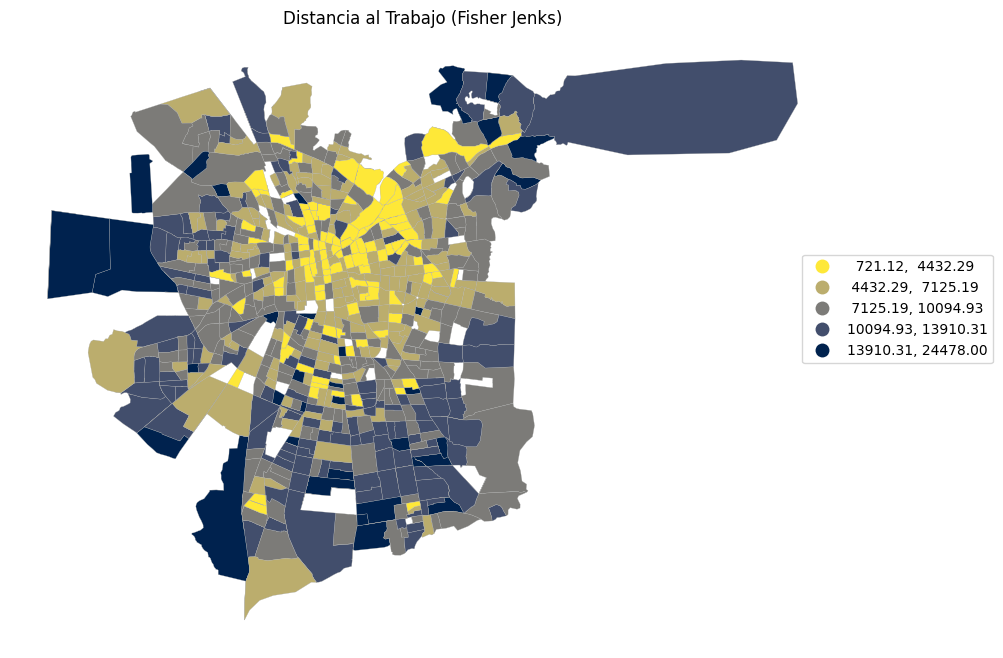

In [28]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

zonas_urbanas_con_distancia.plot(
    ax=ax, 
    column='distancia_al_trabajo', 
    k=5,
    scheme='Fisher_Jenks',
    cmap='cividis_r',
    edgecolor='#abacab',
    linewidth=0.2,
    legend=True
)

plt.title('Distancia al Trabajo (Fisher Jenks)')

leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 0.45, 0.2, 0.2))
ax.set_axis_off()
plt.show()

### Puntos

Ahora probaremos una variante del mapa anterior usando puntos para cada viaje. Para eso, usaremos su lugar de origen, de la misma forma que en el anterior. Para eso, primero debemos filtrar sólo los viajes que se realizan en el área urbana de la RM y sólo aquellos que son de trabajo.

In [29]:
origenes_urbanos = gpd.sjoin(origenes_viajes.to_crs(zonas_urbanas.crs), 
                            zonas_urbanas, 
                            predicate='within', lsuffix='_l', rsuffix='_r')
origenes_a_graficar = origenes_urbanos[origenes_urbanos.PropositoAgregado == 'Trabajo']

Y lo graficamos, igual que el anterior

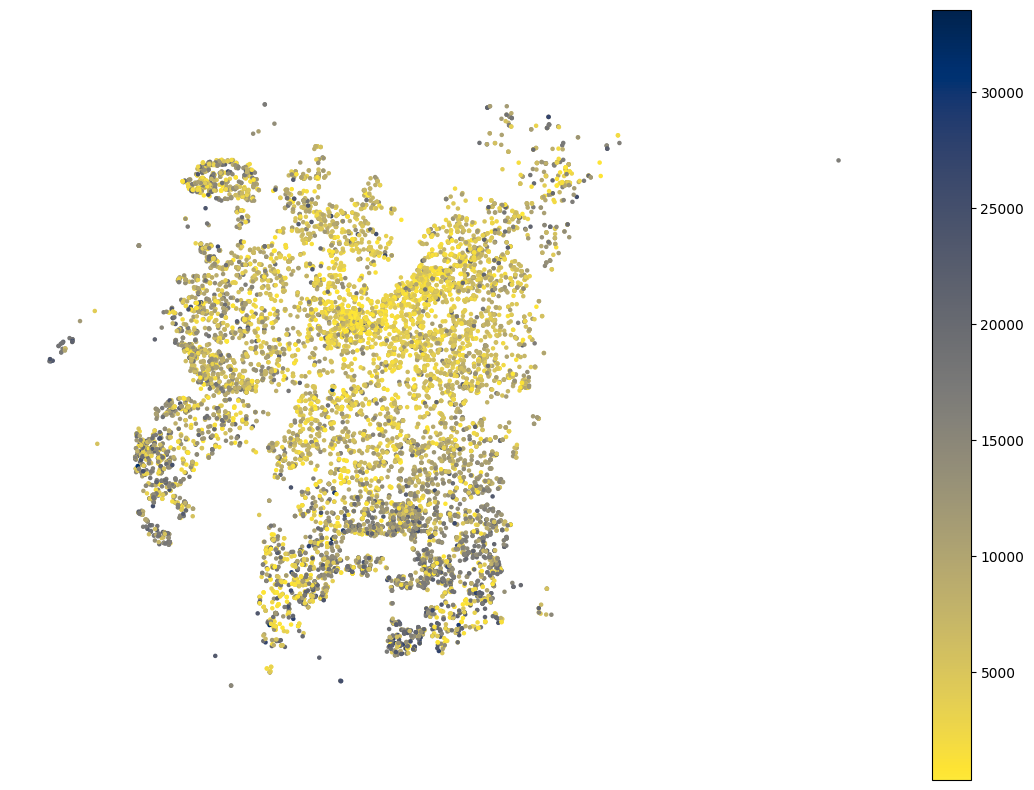

In [30]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

origenes_a_graficar.plot(column='DistEuclidiana', 
       ax=ax, 
       marker='.', 
       markersize=20,  
       cmap='cividis_r', 
       legend=True)

ax.set_axis_off()

Podemos agregarle el mapa de la RM de fondo para darle más contexto.

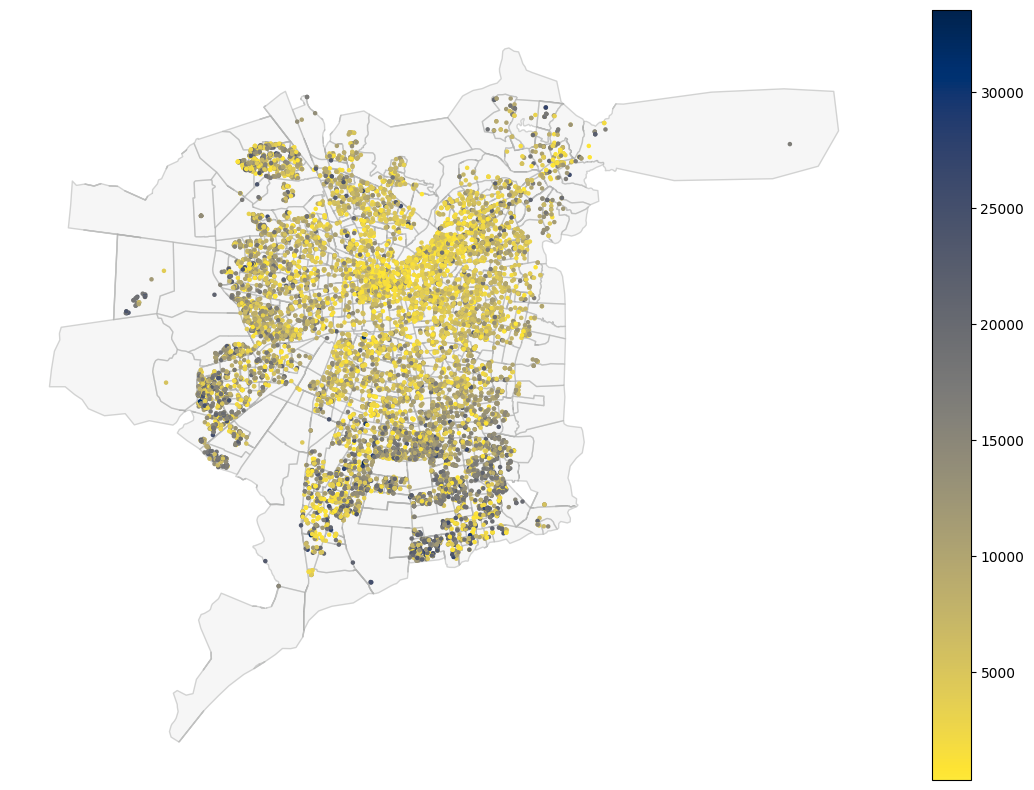

In [31]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

zonas_urbanas.plot(ax=ax, color='#efefef', edgecolor='#abacab', linewidth=1, alpha=0.5)

origenes_a_graficar.plot(column='DistEuclidiana', 
       ax=ax, 
       marker='.', 
       markersize=20,  
       cmap='cividis_r', 
       legend=True)

ax.set_axis_off()

Y podemos comparar ambos mapas.

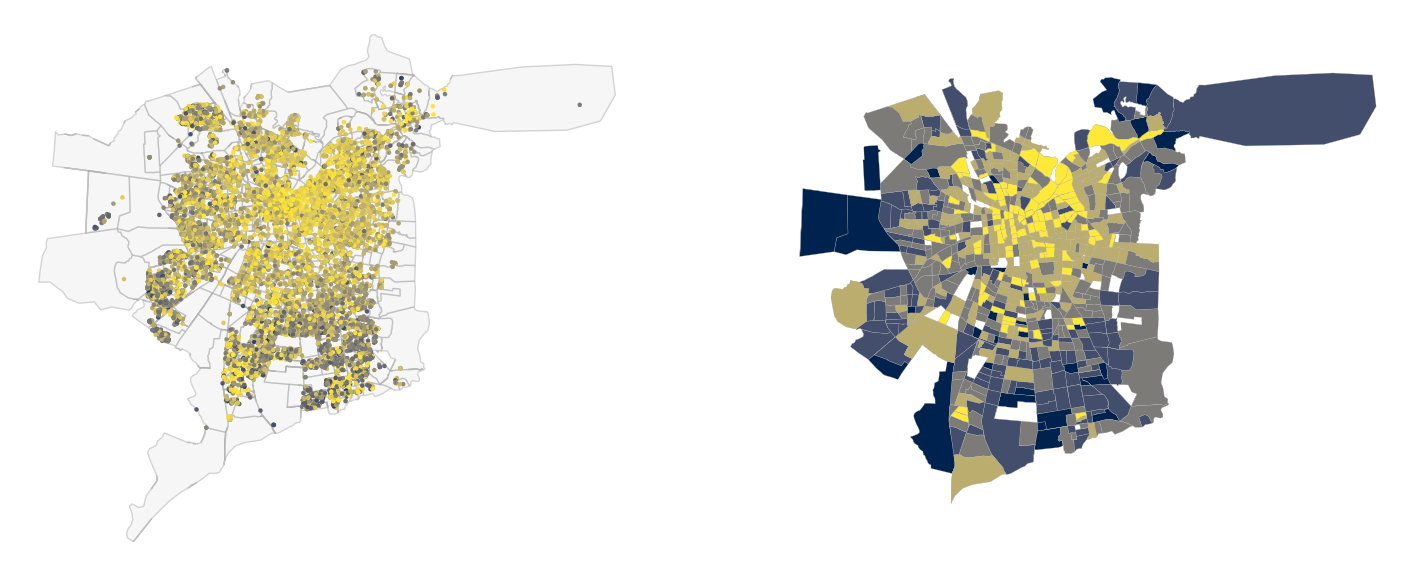

In [32]:
fig, ax = plt.subplots(1,2, figsize=(18,12))

zonas_urbanas.plot(ax=ax[0], color='#efefef', edgecolor='#abacab', linewidth=1, alpha=0.5)
origenes_urbanos[origenes_urbanos.PropositoAgregado == 'Trabajo'].plot(
    column='DistEuclidiana', 
    ax=ax[0], 
    marker='.', 
    markersize=20,  
    cmap='cividis_r')

zonas_urbanas.join(distancia_zonas, how='inner').plot(ax=ax[1],
                                          column='distancia_al_trabajo', 
                                          k=5,
                                          scheme='Fisher_Jenks',
                                          cmap='cividis_r',
                                          edgecolor='#abacab',
                                          linewidth=0.2)

ax[0].set_axis_off()
ax[1].set_axis_off()

### Heatmap

Para graficar un heatmap sobre un mapa, ocuparemos una función especial que calcule el mapa de calor primero, y después lo sobrepondremos al mapa geográfico.

In [33]:
from KDEpy import FFTKDE

def build_heatmap_data(trips):
    # hacemos una lista con las coordenadas de los viajes
    point_coords = np.vstack([trips.geometry.x, trips.geometry.y]).T
    # instanciamos la Fast-Fourier Transform Kernel Density Estimation
    kde = FFTKDE(bw=1e-2, norm=2, kernel='cosine')
    # La variable grid_points define la cantidad de puntos en el espacio en el que se estimará la densidad
    grid_points = 2**6  
    # ajustamos la distribución.
    # ¡Noten que el parámetro weights recibe el factor de expansión!
    grid, points = kde.fit(point_coords, weights=trips['PesoLaboral'].values).evaluate(grid_points)
    x, y = np.unique(grid[:, 0]), np.unique(grid[:, 1])
    z = points.reshape(grid_points, grid_points).T
    return x, y, z

Creamos el mapa de calor y probamos como se ve.

<AxesSubplot:>

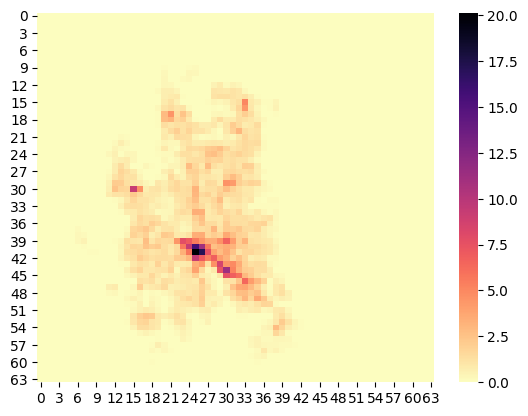

In [34]:
test_heatmap = build_heatmap_data(origenes_urbanos)
sns.heatmap(test_heatmap[2], cmap='magma_r')

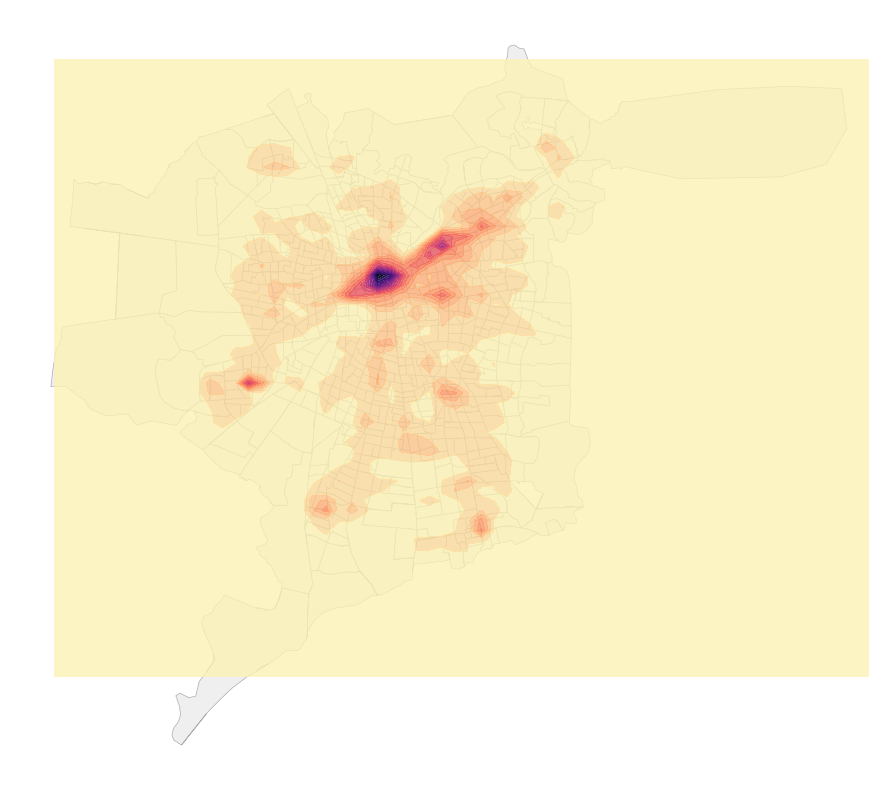

In [35]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

zonas_urbanas.plot(ax=ax, color='#efefef', edgecolor='#abacab', linewidth=0.5)

n_levels = 20
ax.contourf(test_heatmap[0], test_heatmap[1], test_heatmap[2], n_levels, alpha=0.8, cmap="magma_r")

ax.set_axis_off()


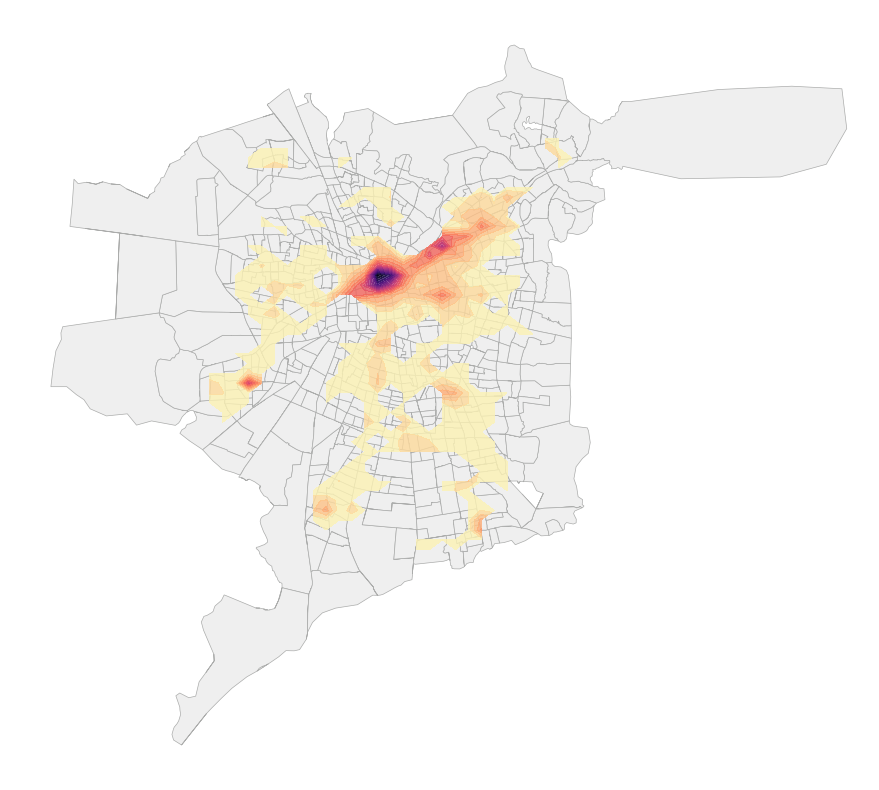

In [36]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

zonas_urbanas.plot(ax=ax, color='#efefef', edgecolor='#abacab', linewidth=0.5)

n_levels = 20
masked_z = np.ma.array(test_heatmap[2], mask=test_heatmap[2] < 1.0)
ax.contourf(test_heatmap[0], test_heatmap[1], masked_z, n_levels, alpha=0.8, cmap="magma_r")

ax.set_axis_off()

### Redes

Primero, importamos [networkx](https://networkx.org/documentation/stable/index.html), que es el paquete que nos facilitará la vida al momento de graficar redes.

In [37]:
import networkx as nx

Cargamos los datos, que son las interacciones de los personajes de la novela Les Miserables.

In [38]:
ls = pd.read_csv('../../datos/lesmiserables.csv')
ls.head()

source           target  value
0         Napoleon           Myriel      1
1  Mlle.Baptistine           Myriel      8
2     Mme.Magloire           Myriel     10
3     Mme.Magloire  Mlle.Baptistine      6
4     CountessdeLo           Myriel      1

Creamos la read a partir de esos datos.

In [39]:
network = nx.from_pandas_edgelist(ls)

Y la dibujamos

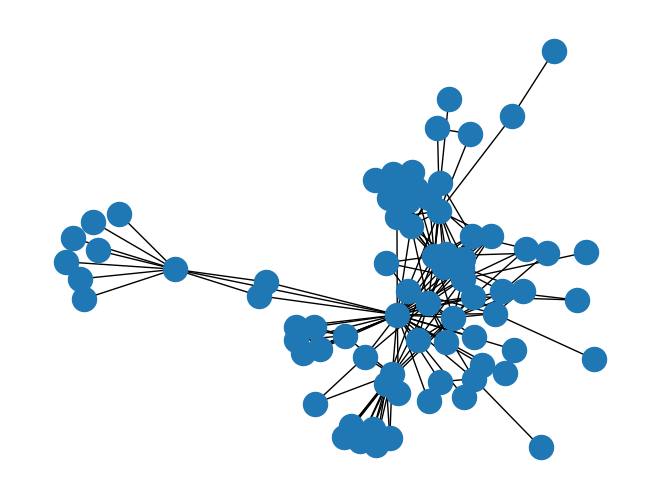

In [40]:
nx.draw(network)

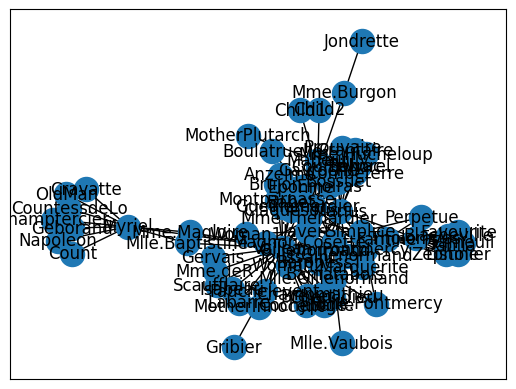

In [41]:
nx.draw_networkx(network)

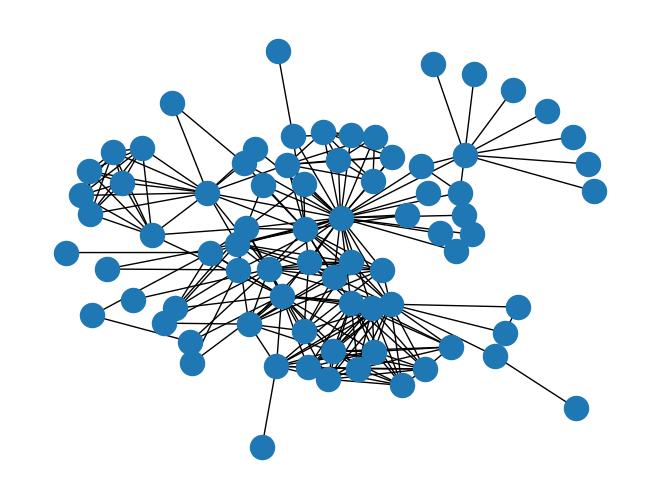

In [42]:
nx.draw_kamada_kawai(network)

También se puede graficar de forma circular. Para eso primero calculamos las posiciones de los nodes y edges a parte.

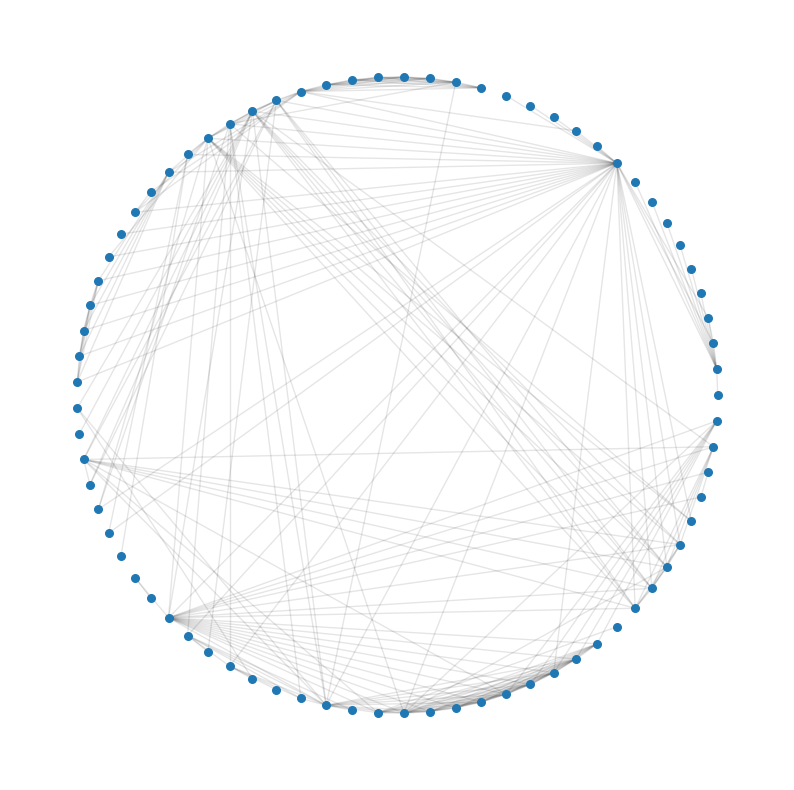

In [43]:
positions = nx.circular_layout(network)

fig, ax = plt.subplots(1,1, figsize=(10,10))

nx.draw_networkx_nodes(network, pos=positions, node_size=30, ax=ax)
nx.draw_networkx_edges(network, pos=positions, alpha=0.1, ax=ax)

ax.set_axis_off()

De vuelta a la EOD. Filtremos los viajes que se realizan en el área urbana y creemos una matriz similar a la anterior de Los Miserables, pero usando zonas de origen y destino de los viajes.

In [44]:
viajes_urbanos = viajes_trabajo[viajes_trabajo.ZonaOrigen.isin(zonas_urbanas.index) & 
                                viajes_trabajo.ZonaDestino.isin(zonas_urbanas.index)].copy()


matrices = (
    viajes_urbanos[pd.notnull(viajes_urbanos.PesoLaboral)]
        .groupby(['ZonaOrigen', 'ZonaDestino'])
        .agg(n_viajes=('PesoLaboral', 'sum'))
)

matrices

n_viajes
ZonaOrigen ZonaDestino            
1          4            100.769253
           5            113.892111
           12            99.704488
           14           529.804720
           18           430.802098
...                            ...
781        765          223.154848
           766          746.538983
           768          424.303390
           770          183.168512
           771          171.987181

[9322 rows x 1 columns]

Las posiciones de las zonas ya están calculadas, asi que ocupamos las coordenadas de los `centroid` de los polígonos.

In [45]:
centroids = zonas_urbanas.centroid
centroids.head()

ID_1
103    POINT (346043.187 6285611.652)
116    POINT (345739.045 6285410.452)
112    POINT (345984.219 6285166.389)
103    POINT (345739.045 6285410.452)
104    POINT (345075.292 6286001.146)
dtype: geometry

In [46]:
node_positions = dict(zip(centroids.index, zip(centroids.x, centroids.y)))
node_positions

{103: (345984.21883090766, 6285166.389157602),
 116: (345075.292025257, 6286001.14641963),
 112: (344883.8047048379, 6285137.991695489),
 104: (344798.1005680902, 6286014.916017409),
 664: (347150.75889629096, 6285833.941707998),
 261: (346749.52068825316, 6285480.571215585),
 251: (348807.4814919198, 6283164.476906451),
 252: (346311.05939881183, 6283804.026980981),
 258: (346731.1094625, 6283090.919852239),
 259: (346103.1581531542, 6283192.6592432195),
 262: (350542.84058910684, 6283466.79820475),
 110: (344402.6440913992, 6284860.984887137),
 117: (345809.88302780397, 6286457.972004443),
 106: (343151.29704732244, 6286135.825612097),
 779: (341228.73083820834, 6285341.987760265),
 107: (343550.619195249, 6286825.3109319005),
 115: (343653.91464136983, 6286197.161866863),
 105: (343637.51087813004, 6286808.824584421),
 109: (343785.6554621931, 6284442.506903299),
 176: (344479.4912406709, 6287466.514143809),
 178: (343864.54320330895, 6288471.675920944),
 180: (344701.43285944656, 6

Creamos un gráfico de redes a partir de esos datos, de la misma forma que lo hicimos con los otros datos.

In [47]:
graph_matrix = matrices[(matrices.n_viajes >= matrices.n_viajes.quantile(0.95))].reset_index()
graph = nx.from_pandas_edgelist(graph_matrix, 
                                source='ZonaOrigen', target='ZonaDestino', 
                                edge_attr='n_viajes',
                                create_using=nx.DiGraph())

Y finalmente lo graficamos sobre el mapa.

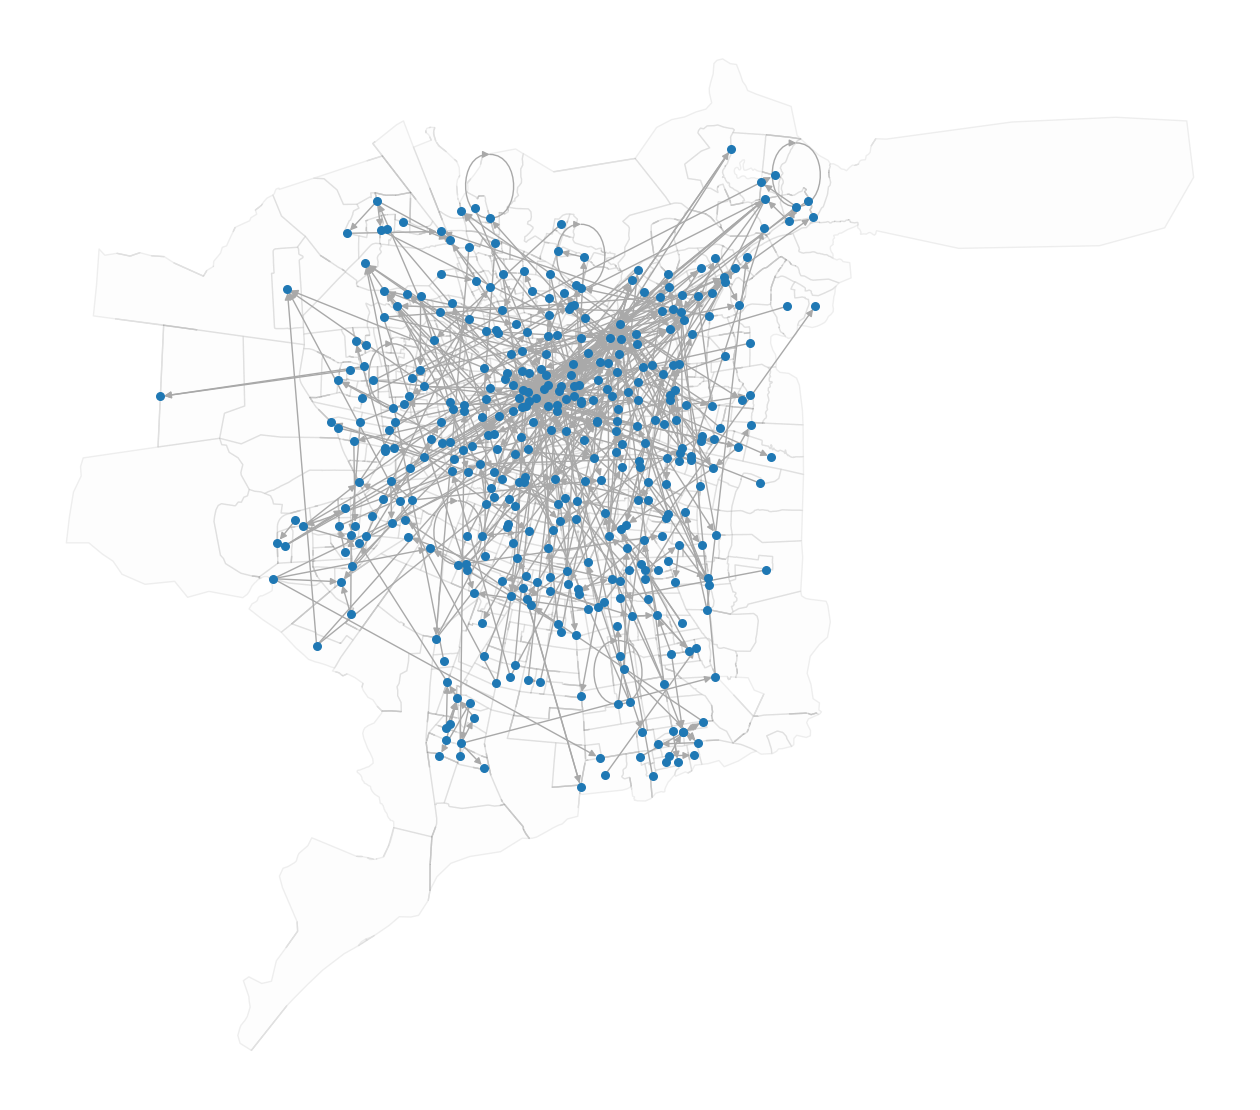

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(16,16))

zonas_urbanas.plot(ax=ax, facecolor='#efefef', edgecolor='#666666', alpha=0.1)
nx.draw(graph, ax=ax, pos=node_positions, node_size=30, edge_color='darkgray')

ax.set_axis_off()

Además podemos usar distintos anchos para los edges, dependiendo del número de viajes realizados de una zona a otra.

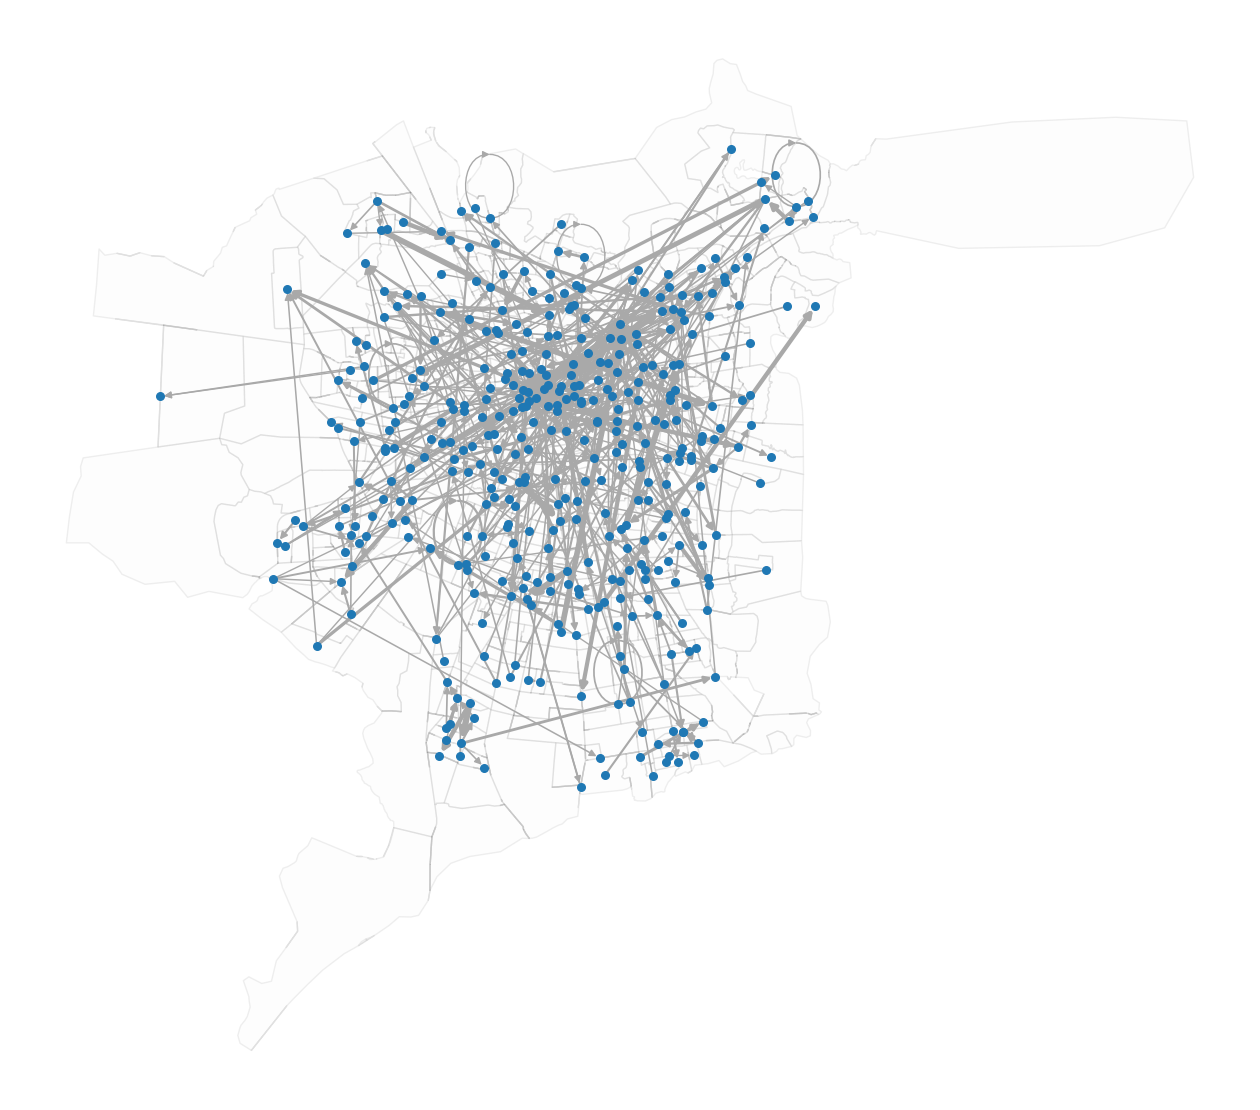

In [49]:
edge_width = graph_matrix['n_viajes'] / graph_matrix['n_viajes'].max() * 7

fig, ax = plt.subplots(1, 1, figsize=(16,16))

zonas_urbanas.plot(ax=ax, facecolor='#efefef', edgecolor='#666666', alpha=0.1)
nx.draw_networkx(graph, ax=ax, pos=node_positions, node_size=30, edge_color='darkgray',
                 with_labels=False, width=edge_width)

ax.set_axis_off()